In [44]:
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix\\\\")
    #else:
        #print('Confusion matrix, without normalization\\\\')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#Load data
df = pd.read_csv("exoplanet.csv")
df.info()
df = df.fillna(0)
df.sort_values('koi_disposition', inplace=True, ascending=False)
df = df.iloc[2500:]

df = df.replace('CONFIRMED', 0) 
df = df.replace('CANDIDATE', 1) 
df = df.replace('FALSE POSITIVE', 2) 
df.to_csv("Exoplanet_mod.csv")

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4263,4264,6137779,K04728.01,0,2,2,0.000,0,0,1,...,-245.0,4.228,0.134,-0.305,1.410,0.763,-0.273,295.85782,41.415691,13.410
5617,5618,3228804,K03996.01,0,2,2,0.000,0,1,1,...,-166.0,4.569,0.036,-0.144,0.826,0.176,-0.070,289.76114,38.353519,15.010
5618,5619,11045383,K01645.01,0,2,2,0.000,0,1,0,...,-138.0,4.503,0.093,-0.076,0.805,0.087,-0.097,298.21094,48.559158,13.418
4260,4261,5090803,K04654.01,0,2,2,0.000,1,0,0,...,-198.0,4.141,0.270,-0.208,1.302,0.418,-0.339,289.22470,40.260818,13.223
5619,5620,11391667,K01652.01,0,2,2,0.000,0,1,0,...,-267.0,3.227,0.287,-0.103,5.618,0.610,-2.287,285.30206,49.263451,12.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,6910,6368175,K03503.02,0,1,1,0.000,0,0,0,...,-179.0,4.545,0.031,-0.319,0.847,0.365,-0.057,293.15085,41.729252,13.827
6910,6911,5471158,K03504.02,0,1,1,0.000,0,0,0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,297.57980,40.603001,15.717
6912,6913,9947653,K04647.02,0,1,1,0.972,0,0,0,...,-159.0,3.870,0.630,-0.270,1.964,0.773,-1.159,290.25931,46.885109,13.726
6913,6914,6527078,K04657.02,0,1,1,0.969,0,0,0,...,-159.0,4.588,0.038,-0.113,0.774,0.133,-0.071,293.29279,41.997589,13.241


In [45]:
#normalize feature with MinMaxScaler after it we need to fit the data
MinMaxScaler = preprocessing.MinMaxScaler()

y_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_disposition'])
x_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
                                                    'koi_period','koi_period_err1','koi_period_err2','koi_time0bk',
                                                    'koi_time0bk_err1','koi_time0bk_err2','koi_impact','koi_impact_err1',
                                                    'koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2',
                                                    'koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1',
                                                    'koi_prad_err2','koi_teq','koi_teq_err1','koi_teq_err2','koi_insol',
                                                    'koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num',
                                                    'koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1',
                                                    'koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag'])

#take all data 
x_train = x_data.values
y_train = y_data

print(y_train.shape)
print(x_train.shape)

x_train = MinMaxScaler.fit_transform(x_train)


(7064, 1)
(7064, 42)


In [46]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# Calculate the mean of each feature and center the data
m = np.mean(x_train, axis=0)
Xc = x_train - m

# Calculate the covariance matrix of the centred data
C = np.cov(Xc, rowvar=False)

# Calculate eigenvalues and eigenvectors of the covariance matrix
lambdas, U = np.linalg.eigh(C)

# Order the eigenvalues from largest to smallest

best_eig_idxs = np.argsort(lambdas)[::-1]
best_eig = lambdas[best_eig_idxs]
best_U = U[:, best_eig_idxs]

# I construct the transformation matrix T: 
T = best_U[:, :4]

# Apply the transformation to the train data, make a scatter plot of the transformed data
# The transformation is performed via the inner product of the transformation matrix T
# and the (centered) data matrix
x_train= np.dot(Xc, T)

In [47]:
from sklearn.cluster import KMeans

np.random.seed(1)
k = 3
max_iter = 1000

# Init estimator and fit it on the data
sk_kmeans = KMeans(n_clusters=k, max_iter=max_iter).fit(x_train)  

# Get predicted labels and centroids
k_labels = sk_kmeans.labels_ # Get cluster labels
sk_centroids = sk_kmeans.cluster_centers_


In [48]:
#couting number of classes for each clusters 
temp = y_train.to_numpy()
x_t = x_train[:, :1]
classes = [0,1,2]
for cl in classes:
    for cl2 in classes:
        count = 0
        for i in range(7064):
            if temp[i]==cl and k_labels[i]==cl2:
                count += 1
        print(cl, " - " , cl2, ": ",count)

0  -  0 :  2246
0  -  1 :  26
0  -  2 :  21
1  -  0 :  2216
1  -  1 :  32
1  -  2 :  0
2  -  0 :  518
2  -  1 :  1211
2  -  2 :  794


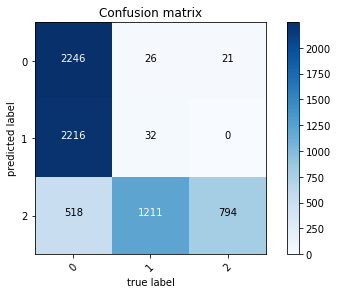

              precision    recall  f1-score   support

           0       0.45      0.98      0.62      2293
           1       0.03      0.01      0.02      2248
           2       0.97      0.31      0.48      2523

    accuracy                           0.43      7064
   macro avg       0.48      0.44      0.37      7064
weighted avg       0.50      0.43      0.38      7064



In [49]:
# Compute confusion matrix
classes = ['0','1','2']
confusion_matrix= metrics.confusion_matrix(y_train, k_labels)

plot_confusion_matrix(confusion_matrix, classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_train, k_labels))


For n_clusters = 3 The average silhouette_score is : 0.6149851028138871


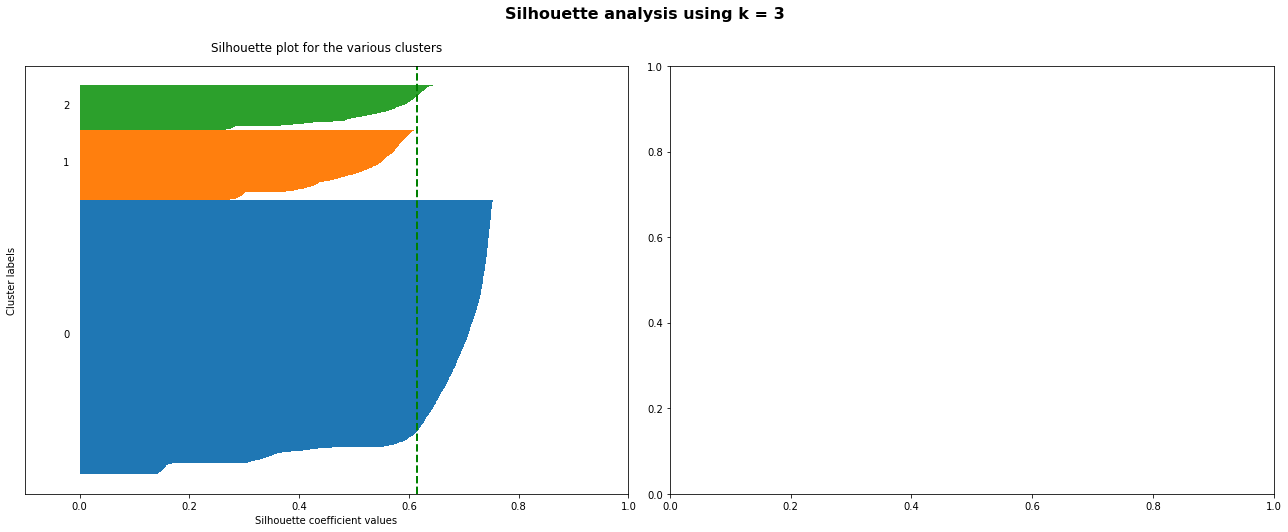

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [3]

for i, k in enumerate([3]):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x_train)
    centroids = km.cluster_centers_

    silhouette_avg = silhouette_score(x_train, labels)
    print(
        "For n_clusters =",
        range_n_clusters[i],
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Get silhouette samples
    silhouette_vals = silhouette_samples(x_train, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)
    

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)